In [376]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from datetime import timedelta


import numpy as np
import pandas as pd
import csv

In [373]:
time_id = []
card_id = []
gyro_status = []
yaw = []
pitch = []
roll = []
x_setpoint = []
y_setpoint = []
z_setpoint = []
kp = []
ki = []
kd = []
accel_x = []
accel_y = []
accel_z = []

with open('DATALOG2.TXT','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        time_id.append(str(row[0]))
        card_id.append(int(row[3]))
        yaw.append(float(row[4]))
        pitch.append(float(row[5]))
        roll.append(float(row[6]))
        x_setpoint.append(float(row[7]))
        y_setpoint.append(float(row[8]))
        z_setpoint.append(float(row[9]))
        kp.append(float(row[10]))
        ki.append(float(row[11]))
        kd.append(float(row[12]))
        accel_x.append(float(row[13]))
        accel_y.append(float(row[14]))
        accel_z.append(float(row[15]))

In [374]:
#clean the data: identify discreet inputs from RFID card

#initialize new list
change_points = []

#initialize index
index = 0

for i in card_id:
    #compare the current and previous values
    current_value = card_id[index]
    previous_value = card_id[index-1]
    
    if current_value != previous_value:
        change_points.append(time_id[index])
    
    index = index + 1
    
#make a new list of the index values of the change points
new_change_points = []
index = 0

for i in change_points:
    new_change_points.append(time_id.index(change_points[index]))
    
    index = index + 1

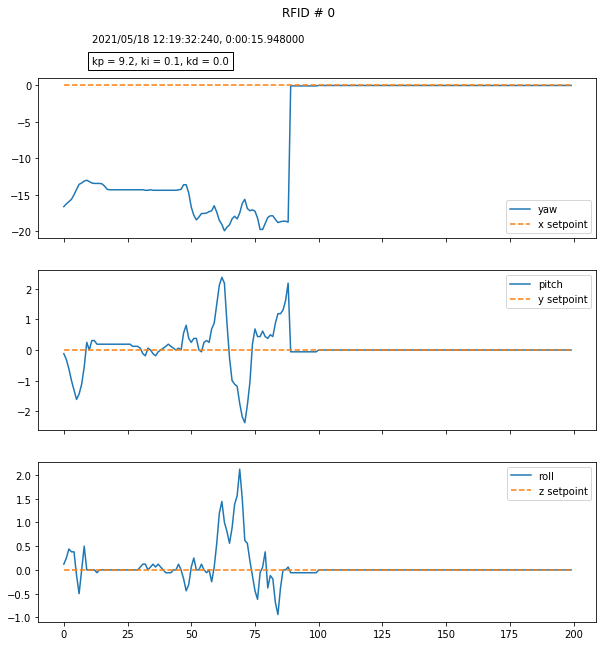

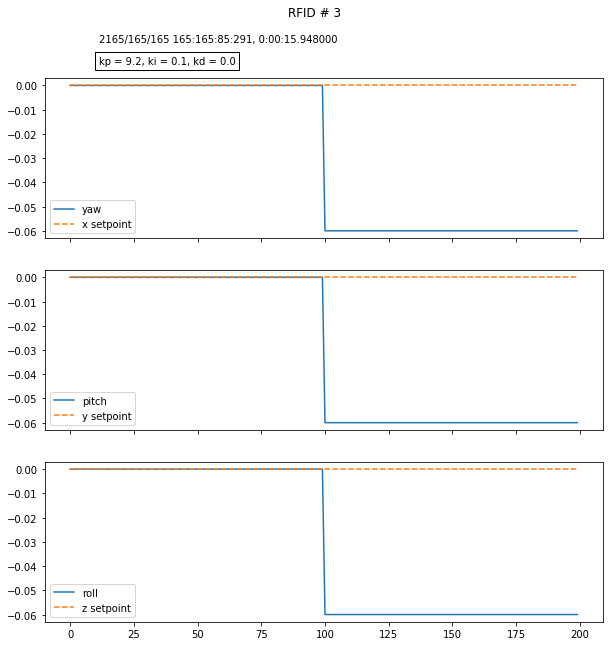

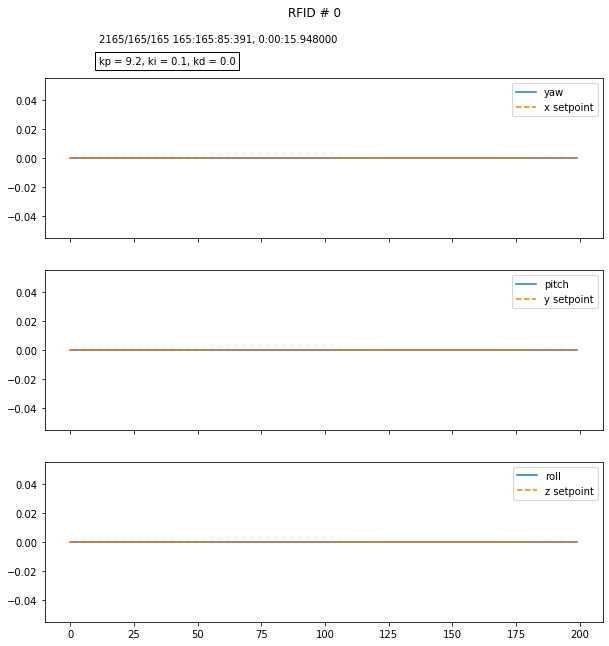

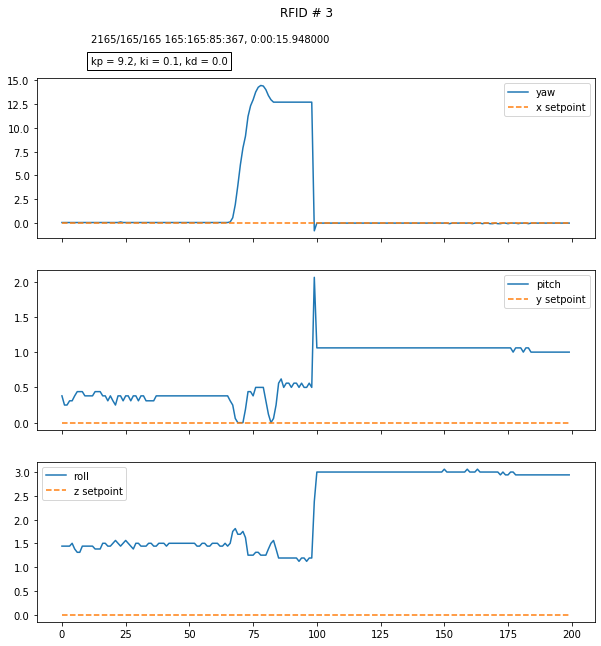

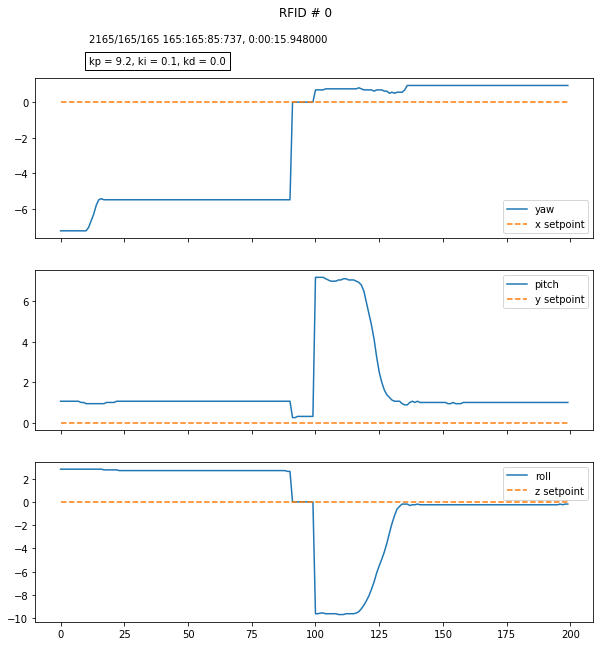

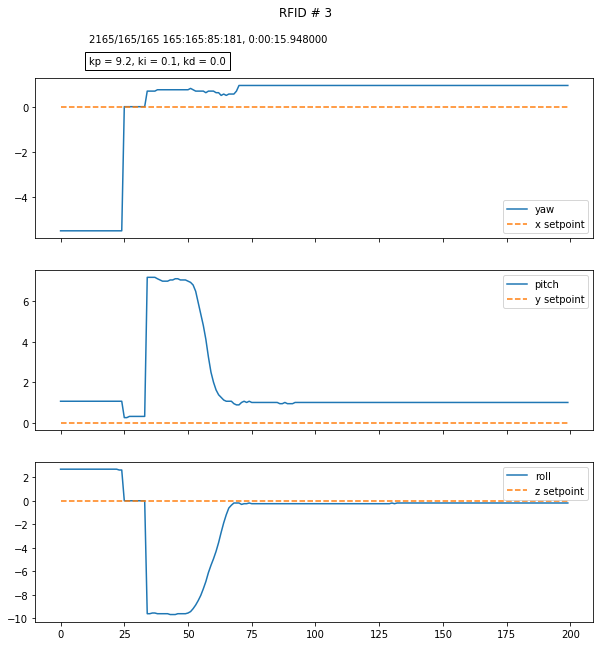

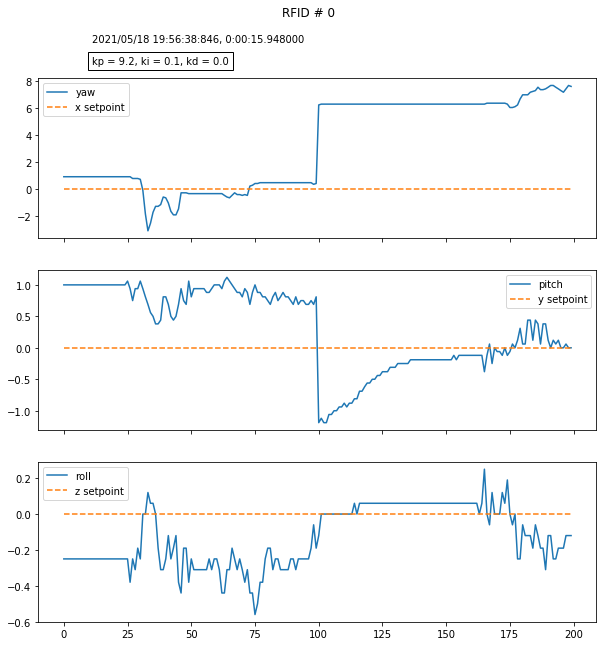

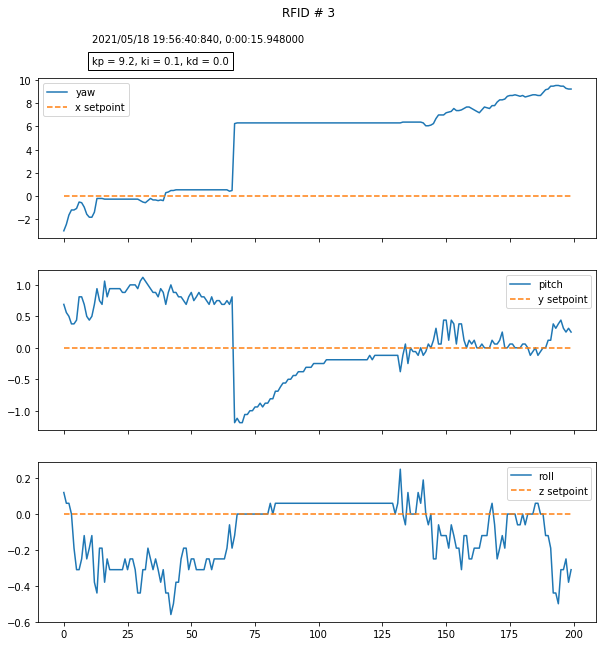

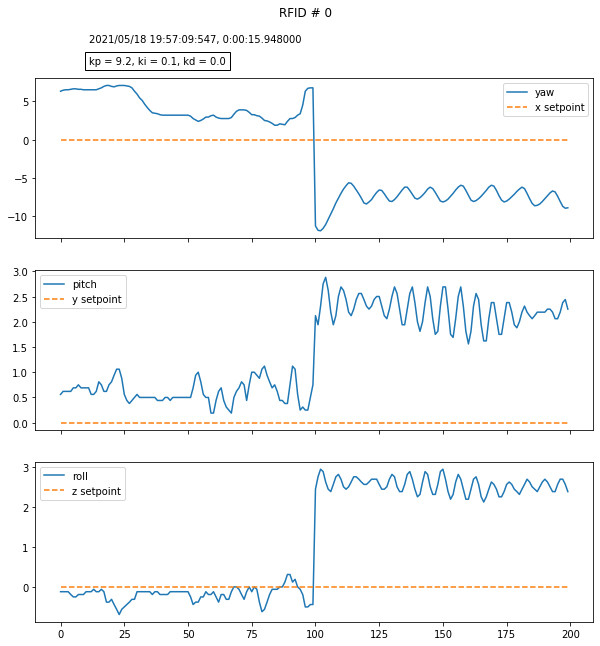

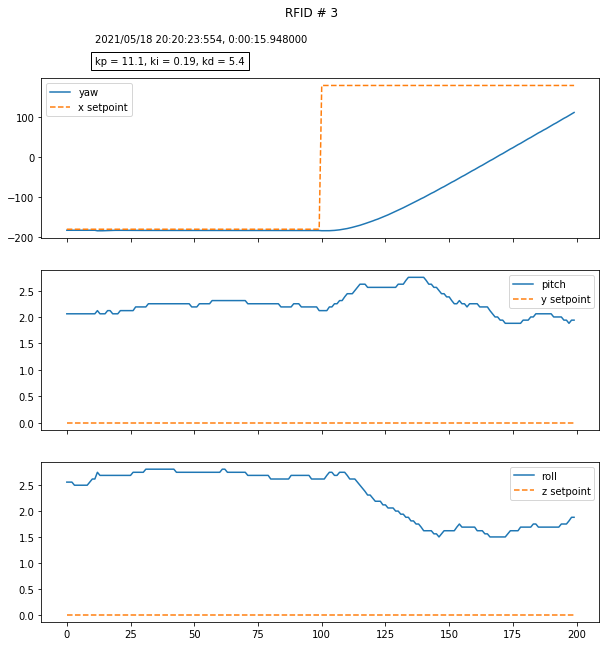

In [399]:
index = 0

for i in new_change_points:
    current_index = new_change_points[index]
    lower_bound = new_change_points[index] - 100
    upper_bound = new_change_points[index] + 100
    
    #lower_bound_time = time_id[lower_bound][11:24]
    #upper_bound_time = time_id[upper_bound][11:24]
    
    #t1 = timedelta(hours=int(lower_bound_time[0:2]), minutes=int(lower_bound_time[3:5]), seconds=int(lower_bound_time[6:8]), milliseconds=int(lower_bound_time[9:12]))
    #t2 = timedelta(hours=int(upper_bound_time[0:2]), minutes=int(upper_bound_time[3:5]), seconds=int(upper_bound_time[6:8]), milliseconds=int(upper_bound_time[9:12]))
    #duration = t2 - t1

    
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(10,10))
    fig.text(0.2,0.9,"kp = {}, ki = {}, kd = {}".format(kp[current_index], ki[current_index], kd[current_index]), bbox=dict(facecolor="white"))
    fig.text(0.2,0.93,"{}, {}".format(time_id[lower_bound], duration))

    fig.suptitle('RFID # {}'.format(card_id[current_index]))

    ax1.plot(yaw[lower_bound:upper_bound], label="yaw")
    ax1.plot(x_setpoint[lower_bound:upper_bound],'--', label="x setpoint")
    ax1.legend()


    ax2.plot(pitch[lower_bound:upper_bound], label="pitch")
    ax2.plot(y_setpoint[lower_bound:upper_bound], '--', label="y setpoint")
    ax2.legend()

    ax3.plot(roll[lower_bound:upper_bound], label="roll")
    ax3.plot(z_setpoint[lower_bound:upper_bound], '--', label="z setpoint")
    ax3.legend()
    plt.savefig('foo {}.png'.format(index), dpi=300)
    
    index = index + 1